In [3]:
import pandas as pd
import numpy as np 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
df = pd.read_csv("C:\\Users\\nitin\\OneDrive\\Desktop\\DM_prac\\spam.csv", encoding='latin-1')

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.columns =['label','text']

In [13]:
df.columns

Index(['label', 'text'], dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['class']=le.fit_transform(df['label'])

In [15]:
df.head()

,label,text,class
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [31]:
ve=TfidfVectorizer(stop_words='english')
x=ve.fit_transform(df['text'])
y=df['class']

In [58]:
mn=MultinomialNB()
mn.fit(x,y)

MultinomialNB()

In [59]:
y_pred=cross_val_predict(mn,x,y)

In [60]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,classification_report

In [61]:
print("accuracy: ",accuracy_score(y,y_pred))
print("recall: ",recall_score(y,y_pred))
print("f1_score: ",f1_score(y,y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, target_names=["Ham","spam"]))

accuracy:  0.970208183776023
recall:  0.7777777777777778
f1_score:  0.8750000000000001

Classification Report:
               precision    recall  f1-score   support

         Ham       0.97      1.00      0.98      4825
        spam       1.00      0.78      0.88       747

    accuracy                           0.97      5572
   macro avg       0.98      0.89      0.93      5572
weighted avg       0.97      0.97      0.97      5572



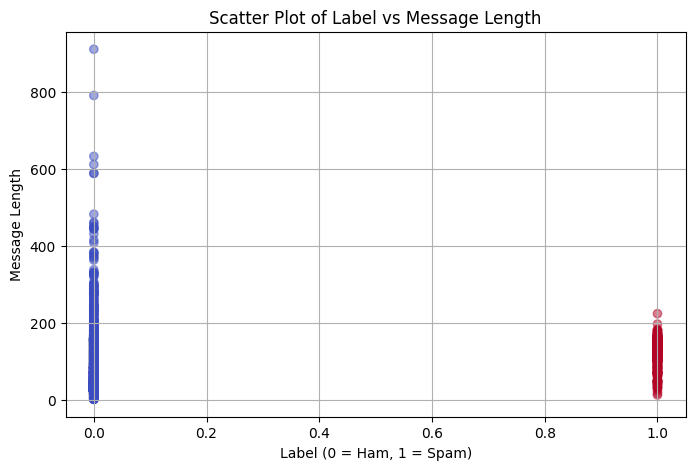

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(df['class'], df['text'].apply(len), alpha=0.5, c=df['class'], cmap='coolwarm')
plt.xlabel("Label (0 = Ham, 1 = Spam)")
plt.ylabel("Message Length")
plt.title("Scatter Plot of Label vs Message Length")
plt.grid(True)
plt.show()

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
ve1=CountVectorizer(binary=True,stop_words='english')
x1=ve1.fit_transform(df['text'])
y1=df['class']


In [65]:
from sklearn.naive_bayes import BernoulliNB
bm=BernoulliNB()

In [66]:
y_pred1=cross_val_predict(bm,x1,y1)

In [67]:
print("accuracy: ",accuracy_score(y1,y_pred1))
print("recall: ",recall_score(y1,y_pred1))
print("f1_score: ",f1_score(y1,y_pred1))
print("\nClassification Report:\n", classification_report(y1, y_pred, target_names=["Ham","spam"]))

accuracy:  0.9781048097631012
recall:  0.8594377510040161
f1_score:  0.9132290184921764

Classification Report:
               precision    recall  f1-score   support

         Ham       0.97      1.00      0.98      4825
        spam       1.00      0.78      0.88       747

    accuracy                           0.97      5572
   macro avg       0.98      0.89      0.93      5572
weighted avg       0.97      0.97      0.97      5572



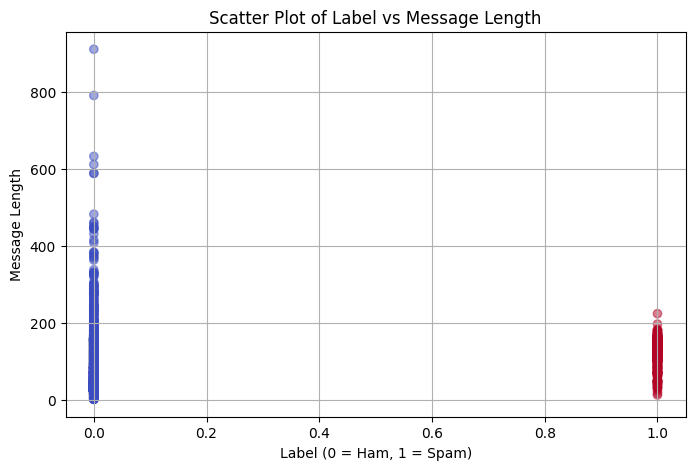

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(df['class'], df['text'].apply(len), alpha=0.5, c=df['class'], cmap='coolwarm')
plt.xlabel("Label (0 = Ham, 1 = Spam)")
plt.ylabel("Message Length")
plt.title("Scatter Plot of Label vs Message Length")
plt.grid(True)
plt.show()

In [69]:
sample_message = ["Congratulations! You've won a free ticket to Bahamas. Reply WIN to claim now."]
sm = ve1.transform(sample_message)   # Assuming 've' is your CountVectorizer()
re = mn.predict(sm)  

In [72]:
re[0]

1